<a href="https://colab.research.google.com/github/AmaroRegly/Boats_Price_Analysis/blob/main/Boats_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data and libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boats_df = pd.read_csv('/content/drive/MyDrive/Data Analyst/Boat Price Analysis/boats ex1.csv')

#Data Cleaning and Data Engeneering

In [ ]:
#Identificar se há ou não a ocorrência de valores nulos e quais os tipos das nossas colunas.
boats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5967 non-null   int64  
 1   type            5967 non-null   object 
 2   boatClass       5967 non-null   object 
 3   make            5967 non-null   object 
 4   model           5966 non-null   object 
 5   year            5967 non-null   int64  
 6   situation       5967 non-null   object 
 7   length_ft       5967 non-null   int64  
 8   beam_ft         5967 non-null   float64
 9   dryWeight_lb    5967 non-null   int64  
 10  hullMaterial    5967 non-null   object 
 11  fuelType        5967 non-null   object 
 12  numEngines      5967 non-null   int64  
 13  totalHP         5967 non-null   int64  
 14  maxEngineYear   5967 non-null   object 
 15  minEngineYear   5967 non-null   object 
 16  engineCategory  5967 non-null   object 
 17  price           5967 non-null   i

### Insights
* Nenhuma ocorrência de valores nulos

In [ ]:
#Identificar se há valores duplicados no dataset
boats_df.duplicated().sum()

0

###Insights
* Nenhuma ocorência de valores duplicados


##Criando a coluna "estação"

In [ ]:
#Com essa nova coluna poderemos, a seguir, analisarmos se há algum tipo de sazonalidade na venda de barcos.

month_df = [1,2,3,4,5,6,7,8,9,10,11,12]

for month in month_df:
    if month in [6, 7, 8]:
        boats_df.loc[boats_df['created_month'] == month, 'season'] = 'summer'
    elif month in [9, 10, 11]:
      boats_df.loc[boats_df['created_month'] == month, 'season'] = 'fall'
    elif month in [12, 1, 2]:
      boats_df.loc[boats_df['created_month']== month, 'season'] = 'winter'
    elif month in [3, 4, 5]:
      boats_df.loc[boats_df['created_month']== month, 'season'] = 'spring'

#General Data Analysis

In [ ]:
#Visão geral dos nosso dados
boats_df.describe()

,id,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,price,sellerId,zip,created_month,created_year
count,5.967000e+03,5967.000000,5967.000000,5967.000000,5967.000000,5967.000000,5967.000000,5.967000e+03,5967.000000,5967.000000,5967.000000,5967.000000
mean,6.868214e+06,2016.071560,21.850679,8.124553,4459.197252,1.147645,192.172951,6.150816e+04,48650.610860,47212.342551,6.197084,2018.350763
std,3.598268e+05,7.158828,7.954425,2.304885,11799.513279,0.439601,288.769547,1.559710e+05,59554.296486,23987.347861,3.361558,0.896304
min,1.021160e+06,1955.000000,3.000000,1.000000,8.000000,1.000000,0.000000,5.190000e+02,1003.000000,1570.000000,1.000000,2005.000000
25%,6.824259e+06,2018.000000,18.000000,7.330000,1169.000000,1.000000,40.000000,1.989250e+04,1250.000000,29708.000000,3.000000,2018.000000
50%,6.952193e+06,2019.000000,20.000000,8.170000,1930.000000,1.000000,115.000000,3.250000e+04,34396.000000,39601.000000,6.000000,2019.000000
75%,7.052366e+06,2019.000000,24.000000,8.500000,3235.000000,1.000000,200.000000,4.599500e+04,57441.000000,69065.500000,9.000000,2019.000000
max,7.271336e+06,2020.000000,103.000000,75.420000,440000.000000,4.000000,4000.000000,4.250000e+06,265784.000000,99508.000000,12.000000,2019.000000


###Insights
* São 5967 registros
* Temos registros de 2005 a 2019
* O barco mais barato é 519,00 e o mais caro 4,250,000

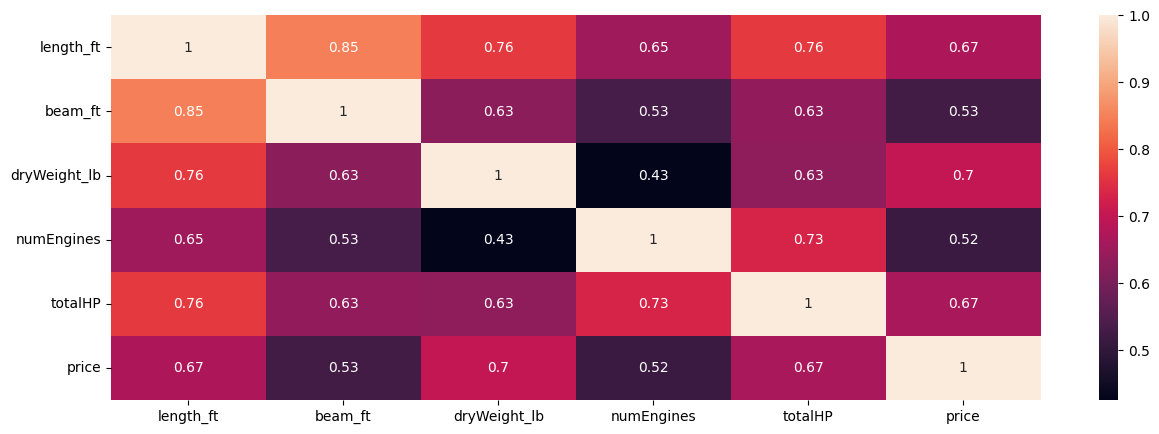

In [ ]:
correlation = boats_df[['length_ft', 'beam_ft' , 'dryWeight_lb', 'numEngines', 'totalHP', 'price']]

plt.rcParams['figure.figsize'] = (15,5)
ax = sns.heatmap(correlation.corr() , annot=True)

###Insights
* Número de motores('numEngines) tem certa relação com a potência do barco ('totalHP')
* Comprimento do barco ('length_ft') também tem relação com a potência da embarcação('totalHP')
* Um fato interessante é que o preço ('price') da embarcação, **não tem muita ligação** com a potência ('totalHP')
* Outro fato interessante é que o comprimento do barco ('length_ft') tem muita relação com o tamanho dos mastro ('beam_ft')

#Business Analysis

##Top 5 marcas que mais venderam?

In [ ]:
#Temos mais de 300 marcas de barcos em nosso dataset
boats_df['make'].nunique()

307

In [ ]:
#Total de vendas por marca
top_brands = boats_df['make'].value_counts().reset_index().head(5)
top_brands

,make,count
0,Tracker,1720
1,Sun Tracker,825
2,Nitro,354
3,Mako,326
4,Tahoe,307


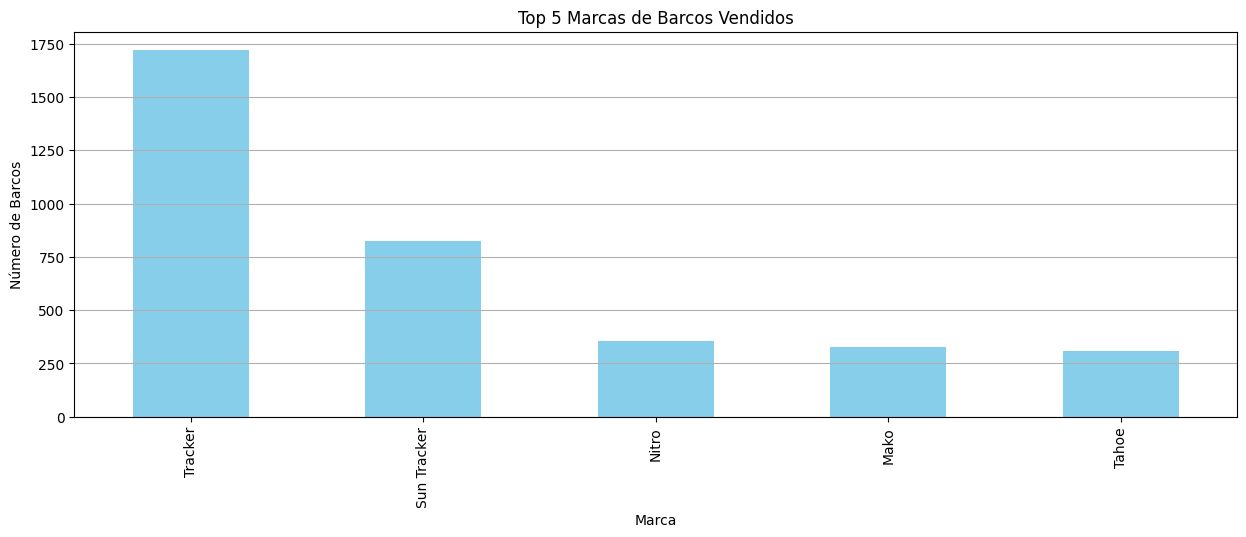

In [ ]:
#Comparação do total de venda por marca
plt.figure(figsize=(15,5))
boats_df['make'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Marca')
plt.ylabel('Número de Barcos')
plt.title('Top 5 Marcas de Barcos Vendidos')
plt.grid(axis='y')
plt.show()

In [ ]:
#Impacto das 5 top marcas de barcos que mais venderam
impact_brands = (boats_df['make'].value_counts() / boats_df['make'].count()) * 100
impact_brands.head(5)

make
Tracker        28.825205
Sun Tracker    13.826043
Nitro           5.932629
Mako            5.463382
Tahoe           5.144964
Name: count, dtype: float64

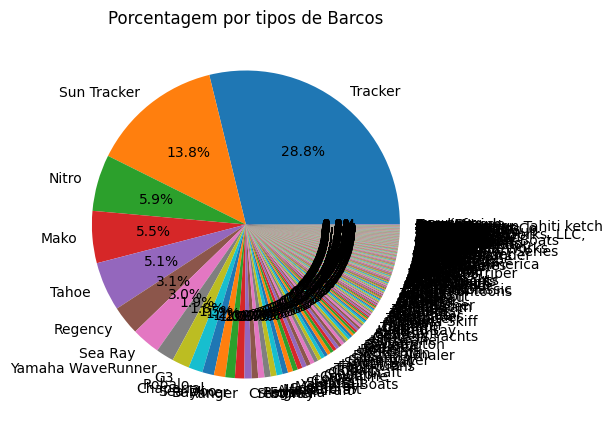

In [ ]:
#Impacto de cada marca nas vendas da nossa loja
plt.figure(figsize=(10,5))
plt.pie(impact_brands, labels=impact_brands.index, autopct='%1.1f%%')
plt.title('Porcentagem por tipos de Barcos')
plt.show()

###Insights
* A marca Tracker de 2005 a 2019 foi a marca que mais vendeu. Total de 1720 unidades o que representou quase 29% do nosso faturamento.
* As top 5 marcas mais vendidas em quantidade, representam mais de 50% do faturamento.

##Top 5 modelos que mais vendem

In [ ]:
#Em nossa base, temos mais de 1700 modelos de embarcações
boats_df['model'].nunique()

1723

In [ ]:
#quantidade de barcos vendidas agrupadas por modelo
top_model = boats_df[ 'model'].value_counts().reset_index().head(5)
top_model

,model,count
0,Z18,82
1,Party Barge 22 DLX,79
2,Pro Team 175 TXW,79
3,Pro Guide V-16 SC,71
4,Pro Guide V-175 Combo,70


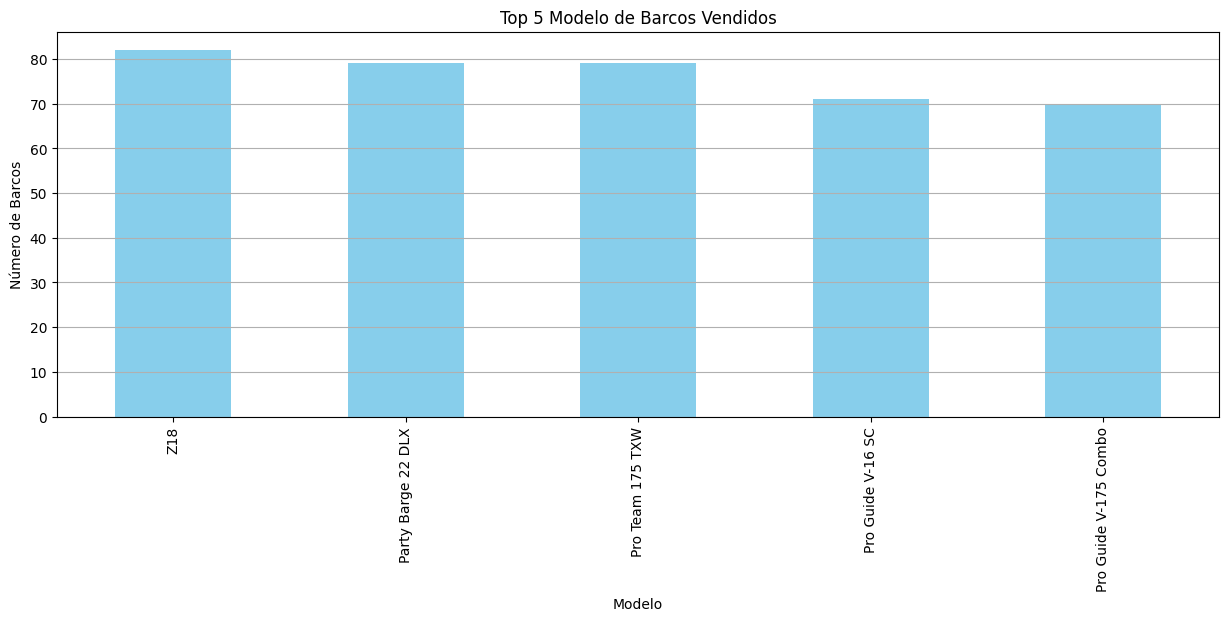

In [ ]:
#Comparação de quantidade vendida por modelo de barco
plt.figure(figsize=(15,5))
boats_df['model'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('Número de Barcos')
plt.title('Top 5 Modelo de Barcos Vendidos')
plt.grid(axis='y')
plt.show()


###Insights

* não existe uma diferença significativa entre as vendas dos top 5 modelos.

##Quais cidades mais vendem

In [ ]:
#Número de cidades que vendemos
boats_df['city'].nunique()

620

In [ ]:
top_city = boats_df[['state', 'city']].value_counts().reset_index().head(5)
top_city

,state,city,count
0,NC,New Bern,170
1,MO,Springfield,85
2,LA,Denham Springs,80
3,FL,Miami,78
4,OK,Kingston,67


In [ ]:
impact_city = (boats_df['city'].value_counts() / boats_df['city'].count()) * 100
impact_city

city
New Bern            2.849003
Springfield         2.161890
Denham Springs      1.340707
Miami               1.307190
Kingston            1.122842
                      ...   
Palm Harbor         0.016759
Portland            0.016759
Fort Myers Beach    0.016759
Essex               0.016759
Holland             0.016759
Name: count, Length: 620, dtype: float64

###Insights
* A nossa loja tem presença em 620 cidades, sendo que, percentualmente nenhuma se destaca. Uma saída para aumentar as vendas pode ser investir em cidades com baixo volume de vendas.

##Qual stado mais vende?

In [ ]:
#Quantidade de estados no dataset
boats_df['state'].nunique()

47

In [ ]:
#Quantidade de barcos vendido por estado
top_state = boats_df['state'].value_counts().reset_index().head(5)
top_state

,state,count
0,FL,850
1,TX,575
2,NC,395
3,TN,297
4,NY,288


<Axes: xlabel='state'>

<Figure size 1000x500 with 0 Axes>

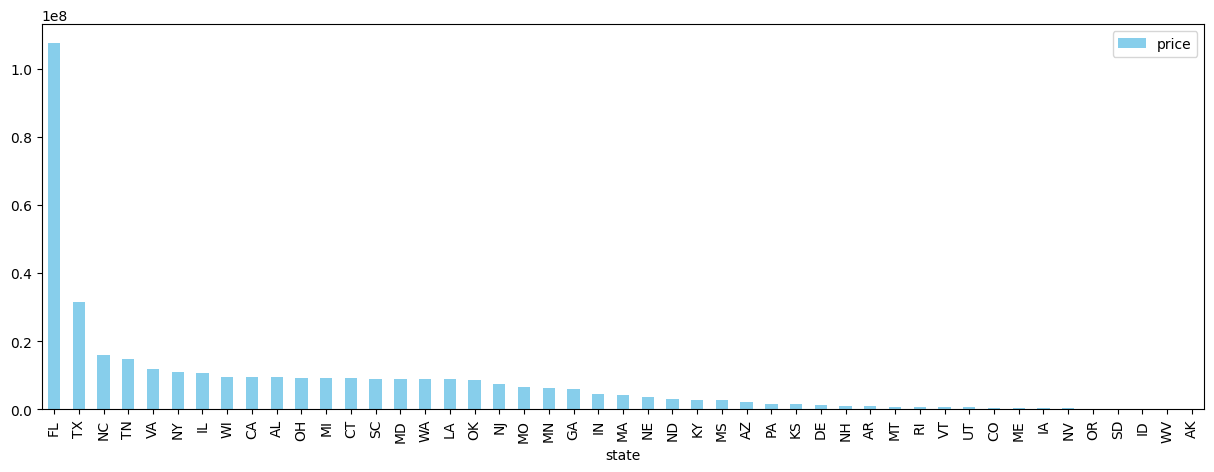

In [ ]:
#Total de faturamento por estado
plt.figure(figsize=(10,5))
boats_df[['state' , 'price']].groupby('state').sum('price').sort_values(by='price' , ascending=False).plot(kind='bar' , color='skyblue')

In [ ]:
impact_state = (boats_df['state'].value_counts() / boats_df['state'].count()) * 100
impact_state

state
FL    14.245014
TX     9.636333
NC     6.619742
TN     4.977376
NY     4.826546
OK     3.904810
CA     3.821016
WI     3.485839
LA     3.452321
VA     3.402045
MI     3.335009
MO     2.781967
IL     2.664656
MN     2.631138
IN     2.547344
SC     2.530585
GA     2.346238
AL     2.161890
CT     1.876990
OH     1.575331
NE     1.541813
ND     1.441260
WA     1.424501
NJ     1.357466
MS     1.340707
MD     1.290431
KY     1.139601
KS     1.089325
AZ     0.854701
DE     0.804424
PA     0.770907
AR     0.670354
MA     0.670354
NH     0.351936
CO     0.335177
UT     0.335177
MT     0.301659
ME     0.251383
VT     0.184347
IA     0.184347
OR     0.167588
SD     0.150830
WV     0.150830
RI     0.134071
ID     0.100553
AK     0.067035
NV     0.067035
Name: count, dtype: float64

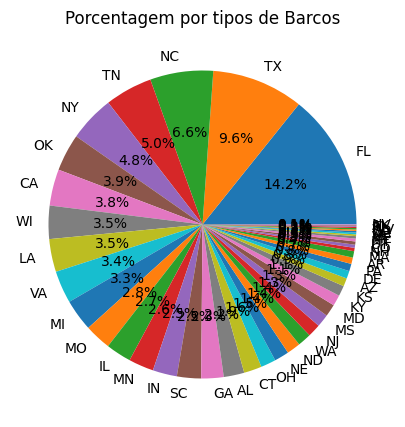

In [ ]:
#Impacto da quantidade de barcos vendida por estado
plt.figure(figsize=(10,5))
plt.pie(impact_state, labels=impact_state.index, autopct='%1.1f%%')
plt.title('Porcentagem por tipos de Barcos')
plt.show()

###Insights
* Podemos ver que em destaque, o estado da Flórida tem um impacto significativo nas quantidades de barcos vendidadas e no total de faturamento.

##Vendas por ano

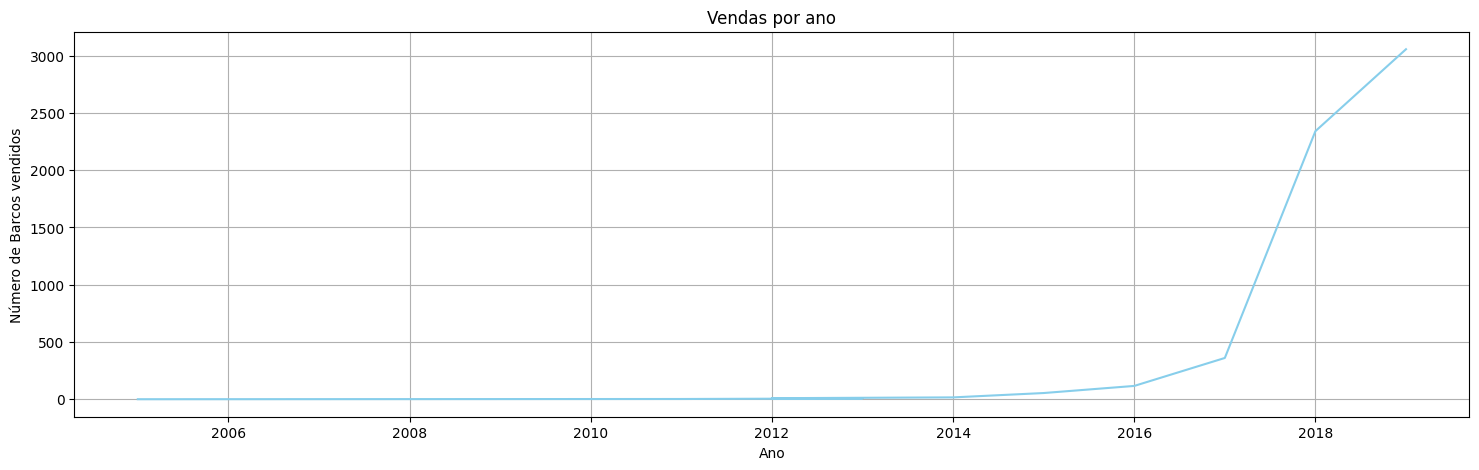

In [ ]:
plt.figure(figsize=(18,5))
boats_df['created_year'].value_counts().plot(kind='line', color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Número de Barcos vendidos')
plt.title('Vendas por ano')
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

In [ ]:
#Com base nas quantidades vendidas no gráfico anterior, fazemos um filtro para analisarmos a média de preço apenas dos anos que tem vendas significativas.
outlier_year = boats_df.query('created_year >= 2014 ')

<Figure size 1800x500 with 0 Axes>

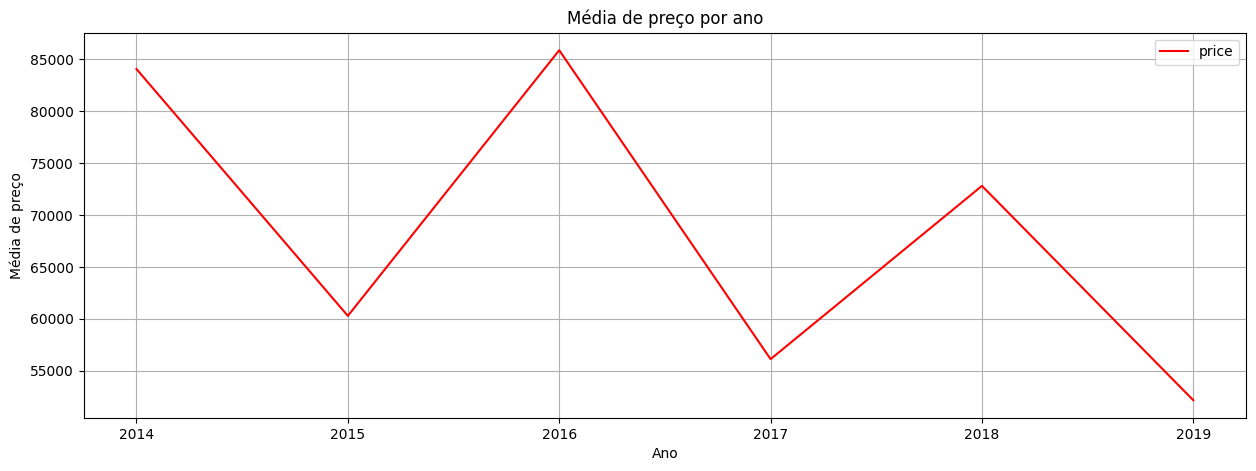

In [ ]:
plt.figure(figsize=(18,5))
outlier_year[['created_year' , 'price']].groupby('created_year').mean('price').plot(kind='line' , color='red')
plt.xlabel('Ano')
plt.ylabel('Média de preço')
plt.title('Média de preço por ano')
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

<Figure size 1800x500 with 0 Axes>

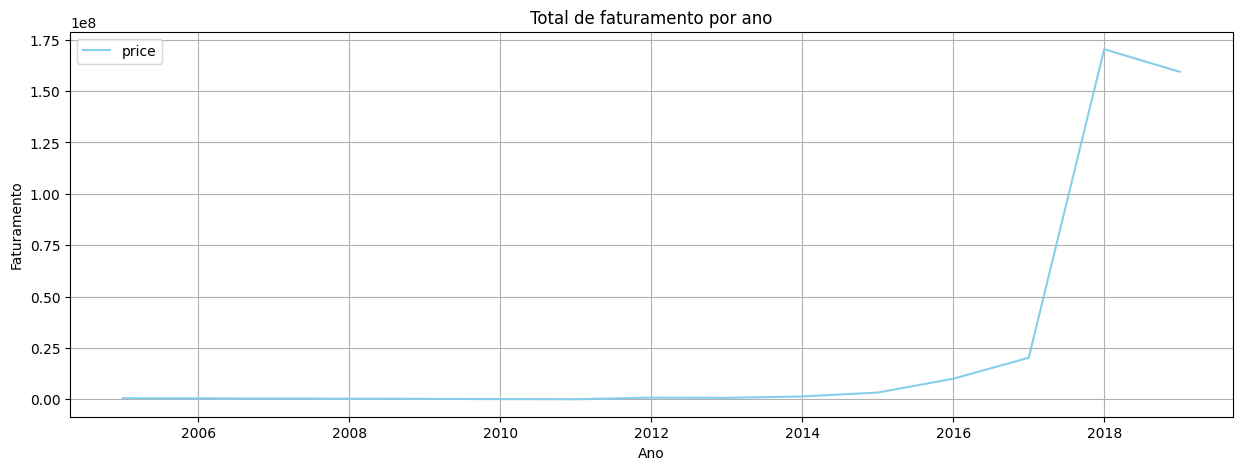

In [ ]:
plt.figure(figsize=(18,5))
boats_df[['created_year' , 'price']].groupby('created_year').sum('price').plot(kind='line', color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Faturamento')
plt.title('Total de faturamento por ano')
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

In [ ]:
maax2018 = boats_df.query('created_year == 2018')
maax2018['price'].max()

4250000

###Insights
* Apesar das vendas terem começads em 2005, as vendas de barco só começaram a ter tração em 2014. E a partir de 2017, que tivemos um "boom" nas vendas, em termos de quantidade vendida.

* O "boom" no faturamento em 2018 muito se deve a embarcação mais cara vendida pela nossa loja.

#Vendas em 2019

In [ ]:
#Filtro para analisar apenas os dados 2019
boats_sales_2019 = boats_df.query('created_year == 2019')
boats_sales_2019.head(5)

,id,type,boatClass,make,model,year,situation,length_ft,beam_ft,dryWeight_lb,...,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year,season
0,7252689,power,power-center,Aquasport,210 CC,1992,used,21,8.50,3000,...,outboard-4s,16500,217053,Englewood,FL,34224,2019-10-16 00:00:00,10,2019,fall
1,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40,11.00,16100,...,inboard-outboard,539000,44260,Harsens Island,MI,48028,2019-09-24 00:00:00,9,2019,fall
2,7271336,power,power-deck,Bayliner,Element 180,2020,new,18,7.42,2000,...,outboard-4s,26995,220570,Marietta,OH,45750,2019-11-02 00:00:00,11,2019,fall
3,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32,10.33,12650,...,multiple,169995,34834,North Charleston,SC,29405,2019-09-19 00:00:00,9,2019,fall
5,7240180,power,power-cruiser,Azimut,43,2019,used,43,13.92,29650,...,multiple,625000,28771,Miami,FL,33140,2019-10-04 00:00:00,10,2019,fall


In [ ]:
#Número de vendas em 2019 agrupada por mês
boats_sales_2019['created_month'].value_counts().sort_index(ascending=True)

created_month
1     547
2     389
3     389
4     468
5     448
6     598
7      75
8      10
9      15
10     25
11     91
Name: count, dtype: int64

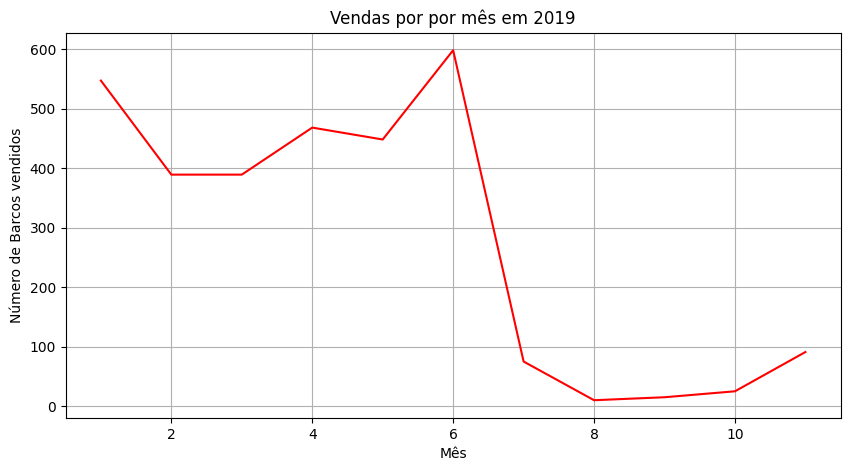

In [ ]:
#Quantidade de barcos vendida por mês em 2019
plt.figure(figsize=(10,5))
boats_sales_2019['created_month'].value_counts().sort_index(ascending=True).plot(kind='line' , color='red')
plt.xlabel('Mês')
plt.ylabel('Número de Barcos vendidos')
plt.title('Vendas por por mês em 2019')
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

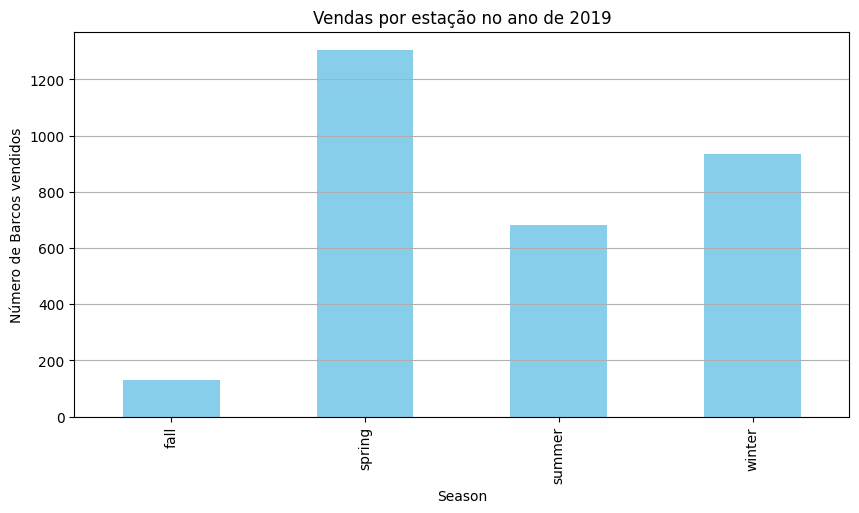

In [ ]:
#Quantidade de barcos vendida por estação do ano em 2019
plt.figure(figsize=(10,5))
boats_sales_2019['season'].value_counts().sort_index(ascending=True).plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Número de Barcos vendidos')
plt.title('Vendas por estação no ano de 2019')
plt.grid(axis='y')
plt.show()

###Insights

* Em termos de quantidade vendida, podemos dizer que as vendas de barcos mantém um patamar interessante do começo do inverno até o começo do verão. Depois disso as vendas caem rapidamente, isso pode indicar que como a demanda por barcos no verão é maior, os preços tendem a subir.

#Sazonalidade por estação

<Axes: xlabel='season'>

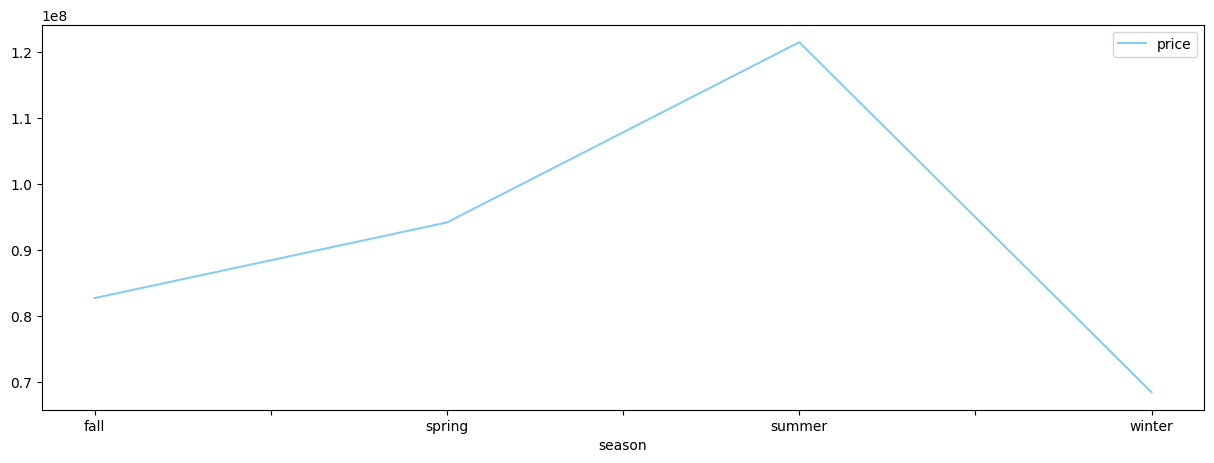

In [ ]:
#Faturamento por estação
boats_df[['season' , 'price']].groupby('season').sum('price').plot(kind='line' , color='skyblue')

<Axes: xlabel='season'>

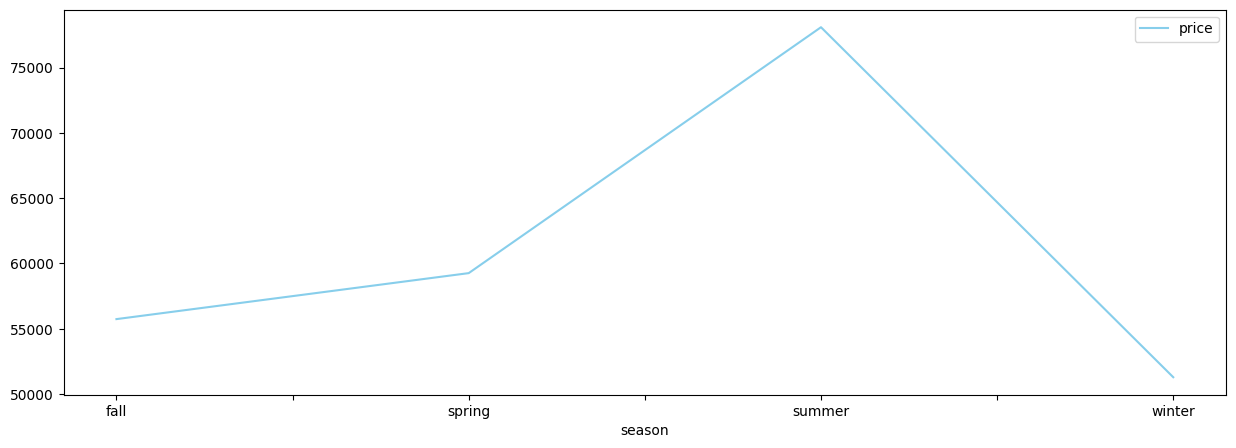

In [ ]:
#Média de preço por estação
boats_df[['season' , 'price']].groupby('season').mean('price').plot(kind='line' , color='skyblue')

###Insights

* Podemos comprovar a queda na quantidade de barcos vendida no verão analisando a soma dos preços por estação, mas principalmente, a média de preço. Podemos ver que no verão é quando os preços estão mais altos e no inverno quando estão mais baixos.

#General Insights

* A marca Tracker é a que mais vende atualmente, representando 28% das nossas vendas. Podemos começar a investir em divulgações e promoções para aumentar as vendas de outras marcas e modelos.

* O estado que mais vendemos barcos foi a Flórida. Seria interessante começarmos a investir em divulgações em outros estados, principalmente os estados litorâneos para aumentarmos tanto a quantidade vendida quanto faturamento.

* Em questão de vendas e faturamento eles vêm aumentando. É interessante mantermos os desempenho nas vendas com o objetivo de sempre melhora-las.

* Quando o assunto é sazonalidade, podemos tentar trabalhar com promoções e ações de vendas de barco para meses e estações em que o faturamento e vendas caem.

In [ ]:
boats_df.to_csv('boats_analysis' , index=False)